# Pandas for Deep Learning

In [1]:
!pip install panda

  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7256 sha256=fc0524881431c815405fd0013ece8c40d84ef844ecee905f13298f884175f06d
  Stored in directory: /root/.cache/pip/wheels/e6/3d/81/a3665ce657d35359ca337b1db2975dbe5cd281a88b8982f6b6
Successfully built panda


In [2]:
import pandas as pd
print(pd.__version__)

1.1.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비

In [4]:
!rm -rf RegularSeasonCompactResults.csv
!wget https://raw.githubusercontent.com/adeshpande3/Pandas-Tutorial/master/RegularSeasonCompactResults.csv
  

--2022-01-12 00:28:48--  https://raw.githubusercontent.com/adeshpande3/Pandas-Tutorial/master/RegularSeasonCompactResults.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4115852 (3.9M) [text/plain]
Saving to: ‘RegularSeasonCompactResults.csv’

RegularSeasonCompac 100%[===================>]   3.92M  --.-KB/s    in 0.07s   

2022-01-12 00:28:59 (55.0 MB/s) - ‘RegularSeasonCompactResults.csv’ saved [4115852/4115852]



In [5]:
!head -10 RegularSeasonCompactResults.csv

Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
1985,20,1228,81,1328,64,N,0
1985,25,1106,77,1354,70,H,0
1985,25,1112,63,1223,56,H,0
1985,25,1165,70,1432,54,H,0
1985,25,1192,86,1447,74,H,0
1985,25,1218,79,1337,78,H,0
1985,25,1228,64,1226,44,N,0
1985,25,1242,58,1268,56,N,0
1985,25,1260,98,1133,80,H,0


# 데이터 로딩

In [6]:
df = pd.read_csv('RegularSeasonCompactResults.csv')

In [7]:
df

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
145284,2016,132,1114,70,1419,50,N,0
145285,2016,132,1163,72,1272,58,N,0
145286,2016,132,1246,82,1401,77,N,1
145287,2016,132,1277,66,1345,62,N,0


In [8]:
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [9]:
df.tail()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
145284,2016,132,1114,70,1419,50,N,0
145285,2016,132,1163,72,1272,58,N,0
145286,2016,132,1246,82,1401,77,N,1
145287,2016,132,1277,66,1345,62,N,0
145288,2016,132,1386,87,1433,74,N,0


In [10]:
df.shape

(145289, 8)

In [11]:
df.index

RangeIndex(start=0, stop=145289, step=1)

In [12]:
df.columns.tolist()

['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc', 'Numot']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145289 entries, 0 to 145288
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Season  145289 non-null  int64 
 1   Daynum  145289 non-null  int64 
 2   Wteam   145289 non-null  int64 
 3   Wscore  145289 non-null  int64 
 4   Lteam   145289 non-null  int64 
 5   Lscore  145289 non-null  int64 
 6   Wloc    145289 non-null  object
 7   Numot   145289 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 8.9+ MB


In [14]:
df.describe()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
count,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000
mean,2001.574834,75.223816,1286.720646,76.600321,1282.864064,64.497009,0.044387
std,9.233342,33.287418,104.570275,12.173033,104.829234,11.380625,0.247819
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1994.000000,47.000000,1198.000000,68.000000,1191.000000,57.000000,0.000000
50%,2002.000000,78.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2010.000000,103.000000,1379.000000,84.000000,1375.000000,72.000000,0.000000
max,2016.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


In [15]:
df.max()

Season    2016
Daynum     132
Wteam     1464
Wscore     186
Lteam     1464
Lscore     150
Wloc         N
Numot        6
dtype: object

# 참조 방법
```
# Direct Access
df.Wteam : Series  <------ 권장
df.Wteam[82] : value
df.Wteam[82:85] : Series
df['Wteam'] : Series  
df['Wteam'][82] : value
df['Wteam'][82:85] : Series
df[82] # ERROR
df[82:85] : DataFrame
df[82:85]['Wteam'] : Series
df[[True, True, True, ....]] : DataFrame

# by loc(location) : 컬럼을 컬럼명으로
df.loc[82] : Series
df.loc[82:85] : DataFrame
df.loc[[82,83,84,85]] : DataFrame
df.loc[(82,83,84,85)] : ERROR
df.loc[82,83,84,85] : ERROR
df.loc[82]['Wteam'] : value <-------- 권장
df.loc[82,'Wteam'] : value <--------- 권장
df.loc[82][2] : value
df.loc[82,2] : ERROR
df.loc['Wteam'] : ERROR

# by iloc(integer location) : 컬럼을 컬럼 인덱스로
df.iloc[82] : Series
df.iloc[82:85] : DataFrame
df.iloc[[82,83,84,85]] : DataFrame
df.iloc[(82,83,84,85)] : ERROR
df.iloc[82,83,84,85] : ERROR
df.iloc[82]['Wteam'] : value
df.iloc[82,'Wteam] : ERROR
df.iloc[82][2] : value  <-------- 권장
df.iloc[82,2] : value  <--------- 권장
df.iloc['Wteam'] : ERROR
```

정리하면

```
특정 칼럼 df.Wteam

loc 사용하여 참조  : df.loc[82, 'Wteam']
iloc 사용하여 참조 : df.iloc[82, 2] 
```

In [16]:
df['Wteam']

0         1228
1         1106
2         1112
3         1165
4         1192
          ... 
145284    1114
145285    1163
145286    1246
145287    1277
145288    1386
Name: Wteam, Length: 145289, dtype: int64

In [17]:
df['Wteam'].max()

1464

In [18]:
df[82:85]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
82,1985,28,1464,71,1134,58,H,0
83,1985,29,1116,59,1416,45,N,0
84,1985,29,1124,99,1341,77,H,0


In [19]:
df['Wteam'].mean()

1286.7206464357246

In [20]:
# df[82] # NOT SUPPORT
df.iloc[82]

Season    1985
Daynum      28
Wteam     1464
Wscore      71
Lteam     1134
Lscore      58
Wloc         H
Numot        0
Name: 82, dtype: object

In [21]:
df.loc[82]

Season    1985
Daynum      28
Wteam     1464
Wscore      71
Lteam     1134
Lscore      58
Wloc         H
Numot        0
Name: 82, dtype: object

In [22]:
df.loc[82]['Wteam']

1464

In [23]:
df.iloc[82]['Wteam']

1464

In [24]:
df.loc[82, 'Wteam']

1464

In [25]:
# df.iloc[82, 'Wteam'] # Not Support
df.iloc[82, 2]

1464

In [26]:
df['Wteam'][82]

1464

In [27]:
df['Wteam'].value_counts()

1181    819
1242    804
1246    765
1314    761
1112    746
       ... 
1101     18
1446     14
1118      6
1289      6
1327      3
Name: Wteam, Length: 364, dtype: int64

# 데이터 구조와 참조 방법

## 마스크 타입 필터

In [28]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

# 필터 선언
filtered_mask = pd.Series([True, False, True, False])
print("filtered_mask legnth =",len(filtered_mask))
print(filtered_mask)
print()

# 필터링된 DF
print(df[filtered_mask])
print()

# 대상 항목만 값 설정
df.loc[filtered_mask, 'BBB'] = -1
print(df)


   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

filtered_mask legnth = 4
0     True
1    False
2     True
3    False
dtype: bool

   AAA  BBB  CCC
0    4   10  100
2    6   30  -30

   AAA  BBB  CCC
0    4   -1  100
1    5   20   50
2    6   -1  -30
3    7   40  -50


## 인덱스 타입 필터

In [29]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

# 필터 선언
filtered_index = np.array([0, 2])
print("filtered_index legnth =",len(filtered_index))
print(filtered_index)
print()

# 필터링된 DF
print(df.loc[filtered_index])
print()

# 대상 항목만 값 설정
df.loc[filtered_index, 'BBB'] = -1
print(df)


   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

filtered_index legnth = 2
[0 2]

   AAA  BBB  CCC
0    4   10  100
2    6   30  -30

   AAA  BBB  CCC
0    4   -1  100
1    5   20   50
2    6   -1  -30
3    7   40  -50


## 단일 조건

In [30]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

# 조건으로 필터
filtered_mask = df.AAA>=5
print("filtered_mask legnth =",len(filtered_mask))
print(filtered_mask)
print()

# 필터링된 DF
print(df[filtered_mask])
print()

# 대상 항목만 값 설정
df.loc[filtered_mask, 'BBB'] = -1
print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

filtered_mask legnth = 4
0    False
1     True
2     True
3     True
Name: AAA, dtype: bool

   AAA  BBB  CCC
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    4   10  100
1    5   -1   50
2    6   -1  -30
3    7   -1  -50


## 복수 조건 - 마스크 사용

In [31]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

import numpy as np

# 복수 조건으로 필터링된 DF
filtered_mask = (df.AAA>=5) & (df.BBB<40)

print("filtered_mask legnth =",len(filtered_mask))
print(filtered_mask)
print()

# 대상 항목만 값 설정
df.loc[filtered_mask, 'BBB'] = -1
print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

filtered_mask legnth = 4
0    False
1     True
2     True
3    False
dtype: bool

   AAA  BBB  CCC
0    4   10  100
1    5   -1   50
2    6   -1  -30
3    7   40  -50


## 복수 조건 - numpy 검색후 인덱스 사용

In [32]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

import numpy as np

# 복수 조건
filtered_index = np.where( (df.AAA>=5) & (df.BBB<40) )[0]
print("filtered_index legnth =",len(filtered_index))
print(filtered_index)
print()

# 필터링된 DF
print(df.loc[filtered_index])
print()

# 대상 항목만 값 설정
df.loc[filtered_index, 'BBB'] = -1
print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

filtered_index legnth = 2
[1 2]

   AAA  BBB  CCC
1    5   20   50
2    6   30  -30

   AAA  BBB  CCC
0    4   10  100
1    5   -1   50
2    6   -1  -30
3    7   40  -50


# HowTo

많은 부분을 https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#에서 가져옴

## DF 구하기

### 조건에 맞는 행으로 구성된 DF 구하기

In [33]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

print(df.loc[df.AAA>=5])
print()

print(df.loc[df.AAA>=5].loc[df.BBB<=30])

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
1    5   20   50
2    6   30  -30


### 특정 컬럼으로 구성된 DF 구하기

In [34]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

print(df["AAA"])
print("type =", type(df["AAA"])) # Series이다.
print()

print(df[["AAA"]]) # 컬럼명의 리스트를 주면 DataFrame이다.
print("type =", type(df[["AAA"]]))
print()

print(df[["AAA", "CCC"]])

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64
type = <class 'pandas.core.series.Series'>

   AAA
0    4
1    5
2    6
3    7
type = <class 'pandas.core.frame.DataFrame'>

   AAA  CCC
0    4  100
1    5   50
2    6  -30
3    7  -50


## 특정 조건에 맞는 행의 값 변경

### 단일 조건

In [35]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df.loc[df.AAA>=5, "BBB"] = -1
print(df)


   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    4   10  100
1    5   -1   50
2    6   -1  -30
3    7   -1  -50


### 복수 조건

In [36]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

filtered_index = df.loc[df.AAA>=5].loc[df.BBB<=30].index
print("filtered_index =", filtered_index)
print()

df.loc[filtered_index, 'BBB'] = -1
print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

filtered_index = Int64Index([1, 2], dtype='int64')

   AAA  BBB  CCC
0    4   10  100
1    5   -1   50
2    6   -1  -30
3    7   40  -50


### 복수 컬럼

In [37]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df.loc[df.AAA>=5, ["BBB","CCC"]] = -1
print(df)


   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    4   10  100
1    5   -1   -1
2    6   -1   -1
3    7   -1   -1


### 특정 조건으로 값 이분 설정 - 각각 설정


In [38]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()


df.loc[df.AAA>=5, df.BBB] = 999
print(df)

df.loc[df.AAA<5, df.BBB] = -999
print(df)



   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC     10     20     30     40
0    4   10  100    NaN    NaN    NaN    NaN
1    5   20   50  999.0  999.0  999.0  999.0
2    6   30  -30  999.0  999.0  999.0  999.0
3    7   40  -50  999.0  999.0  999.0  999.0
   AAA  BBB  CCC     10     20     30     40
0    4   10  100 -999.0 -999.0 -999.0 -999.0
1    5   20   50  999.0  999.0  999.0  999.0
2    6   30  -30  999.0  999.0  999.0  999.0
3    7   40  -50  999.0  999.0  999.0  999.0


### 특정 조건으로 값 이분 설정 - numpy 사용

In [39]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df.BBB = np.where(df.AAA>=5, 999, -999)
print(df)



   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    4 -999  100
1    5  999   50
2    6  999  -30
3    7  999  -50


## 검색

### 값 리스트에 포함되어 있는지 검색

In [40]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

print(df[df.AAA.isin([4, 5, 7])])


   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
3    7   40  -50


### 특정 인덱스 필터링

In [41]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

print(df[df.index.isin([0, 1, 3])])


   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
3    7   40  -50


### 짝수 인덱스 필터링

In [42]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

print(df[df.index%2!=0])


   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
1    5   20   50
3    7   40  -50


## 컬럼 추가


### 특정 컬럼 복사

In [43]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df["AAA_copied"] = df["AAA"]

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC  AAA_copied
0    4   10  100           4
1    5   20   50           5
2    6   30  -30           6
3    7   40  -50           7


### 모든 컬럼 복사

In [44]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

source_cols = df.columns
new_cols = [str(x) + "_copied" for x in source_cols]
df[new_cols] = df[source_cols]

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC  AAA_copied  BBB_copied  CCC_copied
0    4   10  100           4          10         100
1    5   20   50           5          20          50
2    6   30  -30           6          30         -30
3    7   40  -50           7          40         -50


### 인코딩된 컬럼 추가

In [45]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

def encode(AAA):
  if AAA==4 : return "A"
  if AAA==6 : return "B"
  return "C"

df["AAA_encoded"] = df[["AAA"]].applymap(encode)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC AAA_encoded
0    4   10  100           A
1    5   20   50           C
2    6   30  -30           B
3    7   40  -50           C


### 특정 컬럼 값 변경해서

In [46]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df["AAA_doubled"] = df["AAA"]*2.

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC  AAA_doubled
0    4   10  100          8.0
1    5   20   50         10.0
2    6   30  -30         12.0
3    7   40  -50         14.0


### 특정 위치에

In [47]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df.insert(1, 'AAA_doubled', df.AAA*2.)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  AAA_doubled  BBB  CCC
0    4          8.0   10  100
1    5         10.0   20   50
2    6         12.0   30  -30
3    7         14.0   40  -50


## 컬럼 삭제

### 컬럼 이름으로 1개

In [48]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df.drop(columns="BBB", inplace=True)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  CCC
0    4  100
1    5   50
2    6  -30
3    7  -50


### 컬럼이름으로 여러개

In [49]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df.drop(columns=["BBB", "CCC"], inplace=True)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA
0    4
1    5
2    6
3    7


## 데이터 추가

### row 1개 추가

하지 않는다.

만약 필요하다면 list에 추가하고 최종적으로 DataFrmae 생성.

```
data = []
for a, b, c in some_function_that_yields_data():
    data.append([a, b, c])

df = pd.DataFrame(data, columns=['A', 'B', 'C'])
```

### dataframe 전체 추가

In [50]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df2 = pd.DataFrame(
        {"AAA": [8, 9], "BBB": [80, 90], "CCC": [80, 90]}
)


print(df)
print()

print(df2)
print()

df = df.append(df2) # inplace 못한다.

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    8   80   80
1    9   90   90

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50
0    8   80   80
1    9   90   90


### dataframe 3개 이상 합치기

In [51]:
df1 = pd.DataFrame(
        {"AAA": [4, 5], "BBB": [10, 20], "CCC": [100, 50]}
)

df2 = pd.DataFrame(
        {"AAA": [6, 7], "BBB": [30, 40], "CCC": [-30, -50]}
)

df3 = pd.DataFrame(
        {"AAA": [8, 9], "BBB": [80, 90], "CCC": [80, 90]}
)

print(df1)
print()

print(df2)
print()

print(df3)
print()

df = pd.concat([df1, df2, df3], ignore_index=True)

# append() 반복해 쓰면 효율이 떨어진다. 
#df = df1.append(df2).append(df3)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50

   AAA  BBB  CCC
0    6   30  -30
1    7   40  -50

   AAA  BBB  CCC
0    8   80   80
1    9   90   90

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50
4    8   80   80
5    9   90   90


### column 수가 다른 dataframe 합치기

In [52]:
df1 = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df2 = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40]}
)

df = pd.concat([df1, df2])
print(df)
print()


   AAA  BBB    CCC
0    4   10  100.0
1    5   20   50.0
2    6   30  -30.0
3    7   40  -50.0
0    4   10    NaN
1    5   20    NaN
2    6   30    NaN
3    7   40    NaN



## 데이터 삭제

### row index로 1개

In [53]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df.drop(1, inplace=True)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    4   10  100
2    6   30  -30
3    7   40  -50


### row index로 여러개

In [54]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df.drop([1,3], inplace=True)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    4   10  100
2    6   30  -30


In [55]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

target_indexes = [1,3]

df.drop(target_indexes, inplace=True)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    4   10  100
2    6   30  -30


### 특정 조건으로

In [56]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

target_indexes = df.loc[df.AAA>5].index
print(target_indexes)
print()

df.drop(target_indexes, inplace=True)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

Int64Index([2, 3], dtype='int64')

   AAA  BBB  CCC
0    4   10  100
1    5   20   50


In [57]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df.drop(df.loc[df.AAA>5].index, inplace=True)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    4   10  100
1    5   20   50


## 기타

### 특정 칼럼으로 소팅

In [58]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 35, 10], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

print("sort by BBB")
print(df.sort_values(by="BBB"))
print()

print("sort by BBB, CCC")
print(df.sort_values(by=["BBB", "CCC"]))
print()


   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   35  -30
3    7   10  -50

sort by BBB
   AAA  BBB  CCC
0    4   10  100
3    7   10  -50
1    5   20   50
2    6   35  -30

sort by BBB, CCC
   AAA  BBB  CCC
3    7   10  -50
0    4   10  100
1    5   20   50
2    6   35  -30



### 특정 컬럼 값이 특정 값에 가까운 순서로 소팅

In [59]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

target_value = 43.0

abs_value = (df.CCC - target_value).abs()
print("abs_value")
print(abs_value)
print()

print("abs_value.argsort()")
print(abs_value.argsort())
print()

print(df.loc[(df.CCC - target_value).abs().argsort()])

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

abs_value
0    57.0
1     7.0
2    73.0
3    93.0
Name: CCC, dtype: float64

abs_value.argsort()
0    1
1    0
2    2
3    3
Name: CCC, dtype: int64

   AAA  BBB  CCC
1    5   20   50
0    4   10  100
2    6   30  -30
3    7   40  -50


### group by로 묶어서 group중 min 찾기

In [60]:
df = pd.DataFrame(
   {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)

print(df)
print()

print(df.loc[df.groupby("AAA")["BBB"].idxmin()])

   AAA  BBB
0    1    2
1    1    1
2    1    3
3    2    4
4    2    5
5    2    1
6    3    2
7    3    3

   AAA  BBB
1    1    1
5    2    1
6    3    2


## 코드성 데이터 인코딩



### category 타입으로

In [61]:
df = pd.DataFrame(
   {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": ["A", "B", "C", "A", "A", "C", "B", "A"]}
)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AAA     8 non-null      int64 
 1   BBB     8 non-null      object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [63]:
df.BBB = df.BBB.astype('category')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   AAA     8 non-null      int64   
 1   BBB     8 non-null      category
dtypes: category(1), int64(1)
memory usage: 304.0 bytes


In [65]:
df['BBB_code'] = df.BBB.cat.codes

In [66]:
df

,AAA,BBB,BBB_code
0,1,A,0
1,1,B,1
2,1,C,2
3,2,A,0
4,2,A,0
5,2,C,2
6,3,B,1
7,3,A,0


### 특정 카테고리 리스트로

In [67]:
df = pd.DataFrame(
   {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": ["A", "B", "C", "A", "A", "C", "B", "A"]}
)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AAA     8 non-null      int64 
 1   BBB     8 non-null      object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [69]:
types = [ "C", "B", "A" ]
df.BBB = pd.Categorical(df.BBB, categories=types, ordered=True)

In [70]:
df['BBB_code'] = df.BBB.cat.codes

In [71]:
df

,AAA,BBB,BBB_code
0,1,A,2
1,1,B,1
2,1,C,0
3,2,A,2
4,2,A,2
5,2,C,0
6,3,B,1
7,3,A,2


### 특정 카테고리 코드 맵으로

In [72]:
df = pd.DataFrame(
   {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": ["A", "B", "C", "A", "A", "C", "B", "A"]}
)

print(df)
print()

df['BBB_coded'] = df['BBB'].map({"A":0, "B":1, "C":2})

print(df)

   AAA BBB
0    1   A
1    1   B
2    1   C
3    2   A
4    2   A
5    2   C
6    3   B
7    3   A

   AAA BBB  BBB_coded
0    1   A          0
1    1   B          1
2    1   C          2
3    2   A          0
4    2   A          0
5    2   C          2
6    3   B          1
7    3   A          0


## 결측치 확인

### 결측치 존재 여부 확인

In [73]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()

# NaN 인 곳을 True로
print("df.isnull()")
print(df.isnull())
print()

# 컬럼 별로 True가 한 개라도 있는 지
print("df.isnull().any()")
print(df.isnull().any())
print()

# 전체에서 True가 한 개라도 있는 지
print("df.isnull().any().any()")
print(df.isnull().any().any())
print()


     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

df.isnull()
       A      B     C      D
0   True  False  True  False
1  False  False  True  False
2   True   True  True  False
3   True  False  True  False

df.isnull().any()
A     True
B     True
C     True
D    False
dtype: bool

df.isnull().any().any()
True



### 결측치 갯수 확인

In [74]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()

# NaN 인 곳을 True로
print("df.isnull()")
print(df.isnull())
print()

# 컬럼 별 True 갯수
print("df.isnull().sum()")
print(df.isnull().sum())
print()

# 전체 True 갯수
print("df.isnull().sum().sum()")
print(df.isnull().sum().sum())
print()


     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

df.isnull()
       A      B     C      D
0   True  False  True  False
1  False  False  True  False
2   True   True  True  False
3   True  False  True  False

df.isnull().sum()
A    3
B    1
C    4
D    0
dtype: int64

df.isnull().sum().sum()
8



### 각 컬럼별 결측 비율

In [75]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()

# NaN 인 곳을 True로
print("df.isnull()")
print(df.isnull())
print()

# 컬럼 별 True 갯수
print("df.isnull().sum()")
print(df.isnull().sum())
print()

# 컬럼 별 결측치 비율
print(df.isnull().sum()/(len(df))*100)
print()


     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

df.isnull()
       A      B     C      D
0   True  False  True  False
1  False  False  True  False
2   True   True  True  False
3   True  False  True  False

df.isnull().sum()
A    3
B    1
C    4
D    0
dtype: int64

A     75.0
B     25.0
C    100.0
D      0.0
dtype: float64



## 결측치 처리


### 결측치 있는 데이터 버리기

In [76]:
df = pd.DataFrame([[1, 2, 3, 0],
                   [3, 4, 5, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [2, 3, 1, 4]],
                  columns=list('ABCD'))

print(df)
print()

print(df.dropna())


     A    B    C  D
0  1.0  2.0  3.0  0
1  3.0  4.0  5.0  1
2  NaN  NaN  NaN  5
3  2.0  3.0  1.0  4

     A    B    C  D
0  1.0  2.0  3.0  0
1  3.0  4.0  5.0  1
3  2.0  3.0  1.0  4


### 결측치 있는 컬럼 버리기

In [77]:
df = pd.DataFrame([[1, 2, np.nan, 0],
                   [3, 4, 5, 1],
                   [3, 4, np.nan, 5],
                   [2, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()


print(df.dropna(axis=1))


   A  B    C  D
0  1  2  NaN  0
1  3  4  5.0  1
2  3  4  NaN  5
3  2  3  NaN  4

   A  B  D
0  1  2  0
1  3  4  1
2  3  4  5
3  2  3  4


### 특정값으로 채우기

In [78]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()

filled_df = df.fillna(0)

print(filled_df)


     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

     A    B    C  D
0  0.0  2.0  0.0  0
1  3.0  4.0  0.0  1
2  0.0  0.0  0.0  5
3  0.0  3.0  0.0  4


### 컬럼별 특정 값으로 채우기

In [79]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()


values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
filled_df = df.fillna(value=values)

print(filled_df)

     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

     A    B    C  D
0  0.0  2.0  2.0  0
1  3.0  4.0  2.0  1
2  0.0  1.0  2.0  5
3  0.0  3.0  2.0  4


### 앞의 값으로 채우기

In [80]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()

filled_df = df.fillna(method="ffill")

print(filled_df)


     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  3.0  4.0 NaN  5
3  3.0  3.0 NaN  4


### 뒤의 값으로 채우기

In [81]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()

filled_df = df.fillna(method="bfill")

print(filled_df)


     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

     A    B   C  D
0  3.0  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  3.0 NaN  5
3  NaN  3.0 NaN  4


### 컬럼 별 평균값으로 채우기

In [82]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

print(df)
print()

print("df.mean()")
print(df.mean())
print()

filled_df = df.fillna(df.mean())

print(filled_df)


     A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  NaN NaN  5
3  NaN  3.0 NaN  4

df.mean()
A    3.0
B    3.0
C    NaN
D    2.5
dtype: float64

     A    B   C  D
0  3.0  2.0 NaN  0
1  3.0  4.0 NaN  1
2  3.0  3.0 NaN  5
3  3.0  3.0 NaN  4


In [83]:
import numpy as np

df = pd.DataFrame(
   np.random.randn(6, 1),
   index=pd.date_range("2013-08-01", periods=6, freq="B"),
   columns=list("A"),
)

print(df)
print()

df.loc[df.index[3], "A"] = np.nan

print(df)
print()

df = df.ffill()
print(df)

                   A
2013-08-01  0.157832
2013-08-02 -0.530810
2013-08-05  2.302901
2013-08-06  0.379969
2013-08-07  0.431375
2013-08-08 -0.543278

                   A
2013-08-01  0.157832
2013-08-02 -0.530810
2013-08-05  2.302901
2013-08-06       NaN
2013-08-07  0.431375
2013-08-08 -0.543278

                   A
2013-08-01  0.157832
2013-08-02 -0.530810
2013-08-05  2.302901
2013-08-06  2.302901
2013-08-07  0.431375
2013-08-08 -0.543278


### group by 평균값으로 채우기

In [123]:
df = pd.DataFrame([['a', 1, 3, 0],
                   ['a', 1, 5, 1],
                   ['a', 1, np.nan, 5],
                   ['a', 2, 4, 4],
                   ['b', 1, np.nan, 0],
                   ['b', 1, 5, 1],
                   ['b', 2, np.nan, 5],
                   ['b', 2, 5, 4]],
                  columns=list('ABCD'))

print(df)
print()

df['C'] = df['C'].fillna(df.groupby(by=['A', 'B'])['C'].transform('mean'))
print(df)

   A  B    C  D
0  a  1  3.0  0
1  a  1  5.0  1
2  a  1  NaN  5
3  a  2  4.0  4
4  b  1  NaN  0
5  b  1  5.0  1
6  b  2  NaN  5
7  b  2  5.0  4

   A  B    C  D
0  a  1  3.0  0
1  a  1  5.0  1
2  a  1  4.0  5
3  a  2  4.0  4
4  b  1  5.0  0
5  b  1  5.0  1
6  b  2  5.0  5
7  b  2  5.0  4


## 정규화

### Normalization

In [85]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 35, 10], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df2 = (df - df.min()) / (df.max() - df.min())
print(df2)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   35  -30
3    7   10  -50

        AAA  BBB       CCC
0  0.000000  0.0  1.000000
1  0.333333  0.4  0.666667
2  0.666667  1.0  0.133333
3  1.000000  0.0  0.000000


### Standardization

In [86]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 35, 10], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df2 = (df - df.mean()) / df.std()
print(df2)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   35  -30
3    7   10  -50

        AAA       BBB       CCC
0 -1.161895 -0.740613  1.179575
1 -0.387298  0.105802  0.464681
2  0.387298  1.375424 -0.679149
3  1.161895 -0.740613 -0.965107


### 특정 칼럼만

In [87]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 35, 10], "CCC": [100, 50, -30, -50]}
)

print(df)
print()

df2 = (df - df.min()) / (df.max() - df.min())
print(df2)

target_columns = [ "AAA", "BBB" ]
df[target_columns] = df2[target_columns]

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   35  -30
3    7   10  -50

        AAA  BBB       CCC
0  0.000000  0.0  1.000000
1  0.333333  0.4  0.666667
2  0.666667  1.0  0.133333
3  1.000000  0.0  0.000000
        AAA  BBB  CCC
0  0.000000  0.0  100
1  0.333333  0.4   50
2  0.666667  1.0  -30
3  1.000000  0.0  -50


# 시각화

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html 참조함.

## box plot

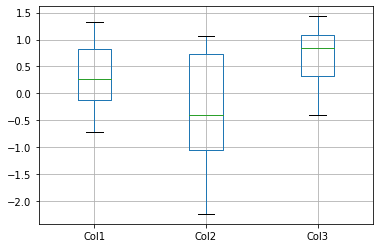

In [88]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])

df.boxplot(column=['Col1', 'Col2', 'Col3'])
plt.show()

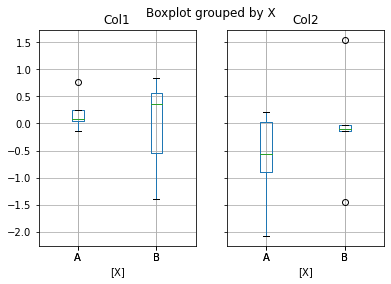

In [89]:
df = pd.DataFrame(np.random.randn(10, 2),
                  columns=['Col1', 'Col2'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
                     'B', 'B', 'B', 'B', 'B'])

df.boxplot(by='X')
plt.show()

## seris plot

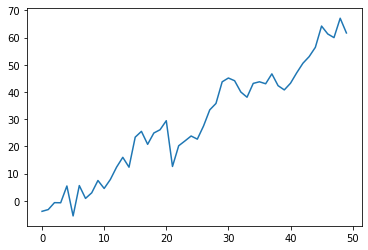

In [90]:
x = np.cumsum(np.random.normal(loc=1, scale=5, size=50))
s = pd.Series(x)

s.plot()
plt.show()

## histogram

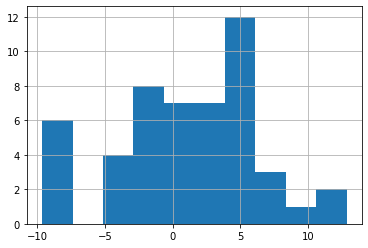

In [91]:
x = np.random.normal(loc=1, scale=5, size=50)
s = pd.Series(x)

s.hist()
plt.show()

## scatter matrix

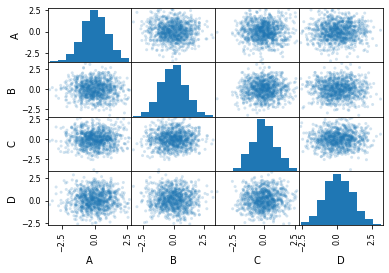

In [92]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])

pd.plotting.scatter_matrix(df, alpha=0.2)
plt.show()

In [93]:
import matplotlib.pyplot as plt

In [94]:
np.random.seed(5)

## DataFrame.plot의 함수들

df.plot.xxx() 함수들은

df.plot(kind="xxx")와 동일하다.

예를 들어 df.plot.bar()는 df.plot(kind="bar")와 동일하다.


### bar()

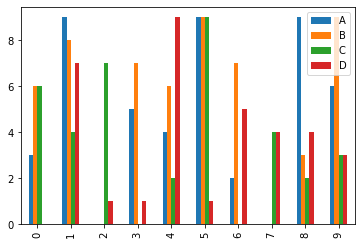

In [95]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.plot.bar()
plt.show()


### barh()

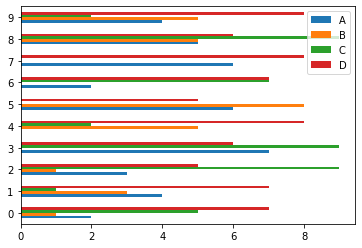

In [96]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.plot.barh()
plt.show()


### box()

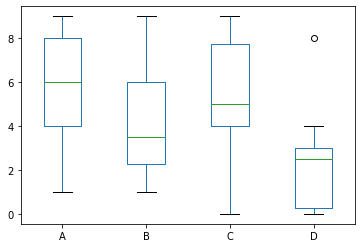

In [97]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.plot.box()
plt.show()

### density()

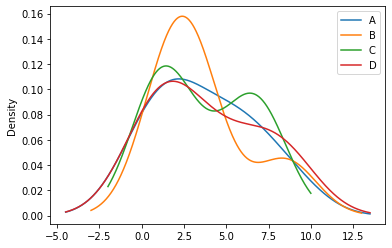

In [98]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.plot.density()
plt.show()

### hist()

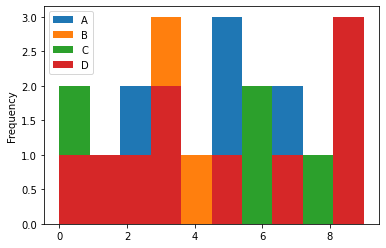

In [99]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.plot.hist()
plt.show()

### kde()

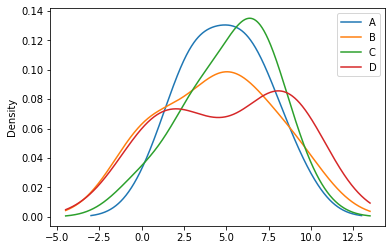

In [100]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.plot.kde()
plt.show()

### line()

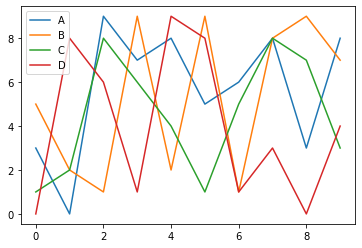

In [101]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.plot.line()
plt.show()

### pie()

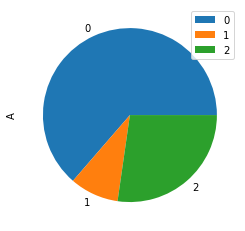

In [102]:
df = pd.DataFrame(np.random.randint(10, size=(3,4)), columns=list("ABCD"))

df.plot.pie(y="A")
plt.show()

### scatter()

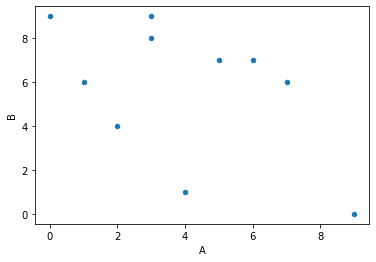

In [103]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.plot.scatter(x="A", y="B")
plt.show()

## Series.plot의 함수들

s.plot.xxx() 함수들은

s.plot(kind="xxx")와 동일하다.

예를 들어 s.plot.bar()는 s.plot(kind="bar")와 동일하다.

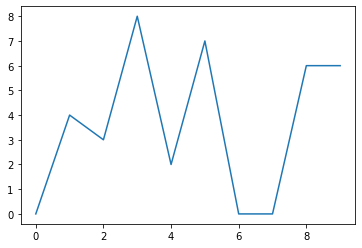

In [104]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.A.plot()
plt.show()

# df.A.plot.line()과 같다.

### bar()

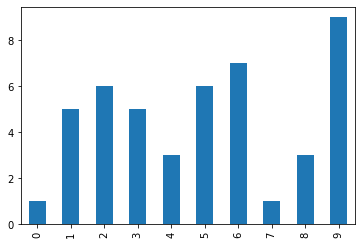

In [105]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.A.plot.bar()
plt.show()


### barh()

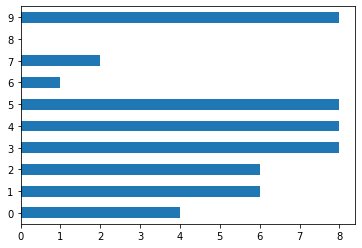

In [106]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.A.plot.barh()
plt.show()


### box()

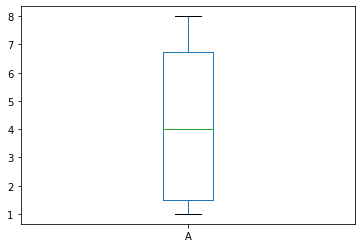

In [107]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.A.plot.box()
plt.show()

### density()

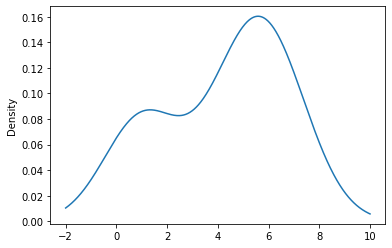

In [108]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.A.plot.density()
plt.show()

### hist()

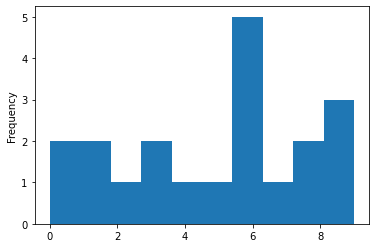

In [109]:
df = pd.DataFrame(np.random.randint(10, size=(20,4)), columns=list("ABCD"))

df.A.plot.hist()
plt.show()

### kde()

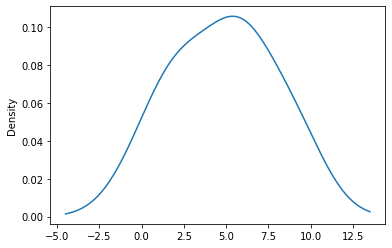

In [110]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.A.plot.kde()
plt.show()

### line()

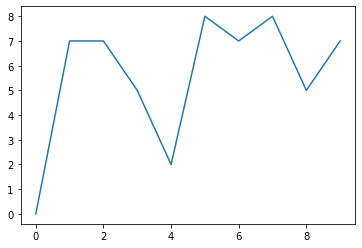

In [111]:
df = pd.DataFrame(np.random.randint(10, size=(10,4)), columns=list("ABCD"))

df.A.plot.line()
plt.show()

### pie()

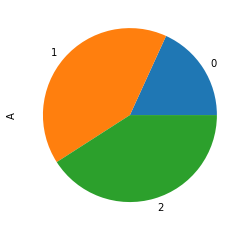

In [112]:
df = pd.DataFrame(np.random.randint(10, size=(3,4)), columns=list("ABCD"))

df.A.plot.pie(y="A")
plt.show()

## 기타

### column별 historgram

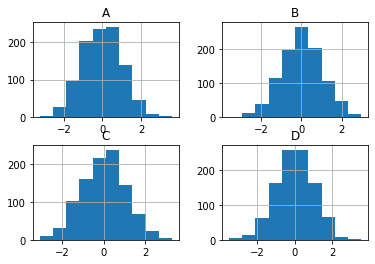

In [113]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=list("ABCD"))
df = df.cumsum()

df.diff().hist()
plt.show()

# 기타 기능들

https://www.datacamp.com/community/blog/python-pandas-cheat-sheet 참조

## numpy로 변환

In [114]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
n = df.to_numpy()
print(n)

[[  4  10 100]
 [  5  20  50]
 [  6  30 -30]
 [  7  40 -50]]


In [115]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

x = df[ ['AAA', 'BBB']].to_numpy()
print(x)

y = df.CCC.to_numpy()
print(y)

[[ 4 10]
 [ 5 20]
 [ 6 30]
 [ 7 40]]
[100  50 -30 -50]


## shuffle

In [116]:
df = pd.DataFrame(
        {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
print(df)
print()

df = df.sample(frac=1).reset_index(drop=True)

print(df)

   AAA  BBB  CCC
0    4   10  100
1    5   20   50
2    6   30  -30
3    7   40  -50

   AAA  BBB  CCC
0    5   20   50
1    7   40  -50
2    6   30  -30
3    4   10  100


## one-hot 인코딩

In [117]:
df = pd.DataFrame(
        {"AAA": [0, 1, 2, 0, 1, 2], "BBB": [10, 20, 30, 40, 50, 60]}
)

print(df)
print()

df = pd.get_dummies(df, columns = ['AAA'])
print(df)


   AAA  BBB
0    0   10
1    1   20
2    2   30
3    0   40
4    1   50
5    2   60

   BBB  AAA_0  AAA_1  AAA_2
0   10      1      0      0
1   20      0      1      0
2   30      0      0      1
3   40      1      0      0
4   50      0      1      0
5   60      0      0      1


In [118]:
df = pd.DataFrame(
        {"AAA": ['A', 'B', 'C', 'A', 'B', 'C'], "BBB": [10, 20, 30, 40, 50, 60]}
)

print(df)
print()

df = pd.get_dummies(df, columns = ['AAA'])
print(df)


  AAA  BBB
0   A   10
1   B   20
2   C   30
3   A   40
4   B   50
5   C   60

   BBB  AAA_A  AAA_B  AAA_C
0   10      1      0      0
1   20      0      1      0
2   30      0      0      1
3   40      1      0      0
4   50      0      1      0
5   60      0      0      1


## 데이터 저장


In [119]:
df.to_csv('saved.csv')
!head -10 saved.csv

,BBB,AAA_A,AAA_B,AAA_C
0,10,1,0,0
1,20,0,1,0
2,30,0,0,1
3,40,1,0,0
4,50,0,1,0
5,60,0,0,1


##  엑셀 파일 읽기/쓰기

In [120]:
df.to_excel("saved.xlsx")
!ls -al 

total 4048
drwxr-xr-x 1 root root    4096 Jan 12 00:29 .
drwxr-xr-x 1 root root    4096 Jan 12 00:27 ..
drwxr-xr-x 4 root root    4096 Jan  7 14:33 .config
-rw-r--r-- 1 root root 4115852 Jan 12 00:28 RegularSeasonCompactResults.csv
drwxr-xr-x 1 root root    4096 Jan  7 14:33 sample_data
-rw-r--r-- 1 root root      89 Jan 12 00:29 saved.csv
-rw-r--r-- 1 root root    5107 Jan 12 00:29 saved.xlsx


In [121]:
df2 = pd.read_excel('saved.xlsx')

In [122]:
df2.head()

,Unnamed: 0,BBB,AAA_A,AAA_B,AAA_C
0,0,10,1,0,0
1,1,20,0,1,0
2,2,30,0,0,1
3,3,40,1,0,0
4,4,50,0,1,0
